In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.plotting_context(context='paper')
sns.set_palette('rainbow')

import pandas as pd
import pickle

In [2]:
sales = pd.read_csv('../../../data/mckinsey/sales.csv', index_col='ID')
skus = pd.read_csv('../../../data/mckinsey/sku.csv', index_col='SKU')

covid_response = pd.read_excel('../../../data/oxford/OxCGRT_timeseries_all.xlsx')

sales = sales.join(skus, on='SKU')

sales['date'] = pd.to_datetime(sales['date'])
sales = sales.loc[sales['date'] > '2020-04-01']

sales_to_predict = pd.read_csv('../../../data/mckinsey/test.csv', index_col='ID')
sales_to_predict['date'] = pd.to_datetime(sales_to_predict['date'])

In [3]:
timeframe = pd.date_range(start=sales['date'].min(), end=sales['date'].max(), freq='D')

In [4]:
sales.describe()

,geoCluster,SKU,price,sales,brandId,lagerUnitQuantity,Units,trademark,countryOfOrigin
count,4.605238e+06,4.605238e+06,778361.000000,778361.000000,2.614647e+06,4.605238e+06,0.0,3.547617e+06,2.275995e+06
mean,2.219991e+03,3.671248e+05,67.490814,3.593757,3.663741e+03,1.156733e+02,NaN,6.290517e+03,7.332296e+00
std,2.458815e+02,3.005083e+05,85.631855,4.627170,2.625976e+03,1.602863e+02,NaN,4.434512e+03,1.009475e+01
min,9.200000e+01,2.400000e+01,0.000000,0.001000,9.670000e+02,5.000000e-01,NaN,2.970000e+02,1.000000e+00
25%,2.049000e+03,3.946500e+04,24.190000,1.000000,1.330000e+03,1.000000e+00,NaN,1.921000e+03,1.000000e+00
50%,2.158000e+03,3.637130e+05,38.490000,2.500000,2.737000e+03,1.500000e+00,NaN,5.070000e+03,1.000000e+00
75%,2.269000e+03,6.427000e+05,61.890000,4.000000,7.358000e+03,3.000000e+02,NaN,9.666000e+03,1.400000e+01
max,3.230000e+03,8.381370e+05,7246.890000,801.000000,8.314000e+03,5.500000e+02,NaN,1.515600e+04,3.700000e+01


In [5]:
skus = sales['SKU'].unique()

In [6]:
price_histories = {}

for sku in skus:
    item_price_history = sales.loc[(sales['SKU'] == sku) & (sales['price'] != 1)].set_index('date')['price']
    item_price_history = item_price_history.fillna(method='ffill')
    item_price_history = item_price_history.groupby(level=0).mean().reindex(timeframe)

    price_histories[sku] = item_price_history

with open('../../../data/sku_price_histories.pickle', 'wb') as handle:
    pickle.dump(price_histories, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
price_histories

{32485: 2020-04-02    42.090000
 2020-04-03    42.090000
 2020-04-04    40.160000
 2020-04-05    39.284022
 2020-04-06    39.376294
                 ...    
 2021-07-01    42.197874
 2021-07-02    41.636597
 2021-07-03    41.522723
 2021-07-04    41.507232
 2021-07-05    41.357708
 Freq: D, Name: price, Length: 460, dtype: float64,
 32549: 2020-04-02          NaN
 2020-04-03          NaN
 2020-04-04          NaN
 2020-04-05    39.890000
 2020-04-06    39.890000
                 ...    
 2021-07-01    68.791076
 2021-07-02    68.532595
 2021-07-03    68.589654
 2021-07-04    68.658512
 2021-07-05    68.473793
 Freq: D, Name: price, Length: 460, dtype: float64,
 32550: 2020-04-02          NaN
 2020-04-03          NaN
 2020-04-04          NaN
 2020-04-05    80.990000
 2020-04-06    81.173333
                 ...    
 2021-07-01    63.895556
 2021-07-02    63.728776
 2021-07-03    63.916822
 2021-07-04    63.858222
 2021-07-05    63.755217
 Freq: D, Name: price, Length: 460, dtype: float64

(0.0, 64.97191489361703)

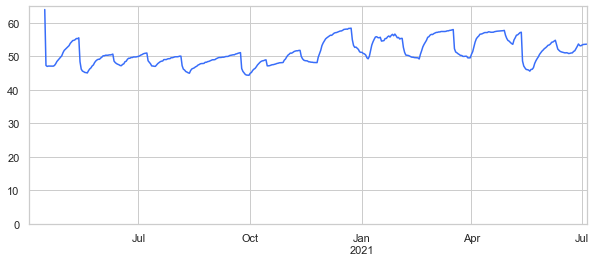

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))

price_histories[819149].plot(ax=ax)
ax.set_ylim(0)